<a href="https://colab.research.google.com/github/emichester/08MIAR_Aprendizaje_por_Refuerzo/blob/main/ProyectoPractico/08MIAR_Proyecto_Programacion_SOLUCION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: [Caamaño de Melo, Guillermo](mailto:elguillesise@gmail.com)
*   Alumno 2: [Hernández Salas, Emilio Jesús](mailto:emiliohersal@gmail.com)
*   Alumno 3: [Rodríguez Juárez, Javier](mailto:jr.juarez.79@gmail.com)






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [ ]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [ ]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

Archivos en el directorio: 
['08MIAR_Proyecto_Programacion_SOLUCION.ipynb', 'data', 'imgs', 'logs', 'weights']


---
### 1.4. Instalar librerías necesarias

In [ ]:
%%capture

if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.8
else:
  %pip install pandas==1.4.4
  %pip install matplotlib==3.4.3
  %pip install contourpy==1.0.4
  %pip install openpyxl==3.1.2
  %pip install numpy==1.19.2
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

---
### 1.5. Definir directorios del proyecto en local

In [ ]:
if not IN_COLAB:
    dir_root = ''

WEIGHTS_PATH = os.path.join(dir_root, "weights")
CHECKPOINT_PATH = os.path.join(dir_root, "checkpoints")
LOGS_PATH = os.path.join(dir_root, "logs")
HYPERPARAMETERS_PATH = os.path.join(dir_root, "data", 'Hiperparametros.xlsx')

Dibujamos el parámetro del LOG elegido

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

def graph_training(env_name, model_name, variable='mean_q'):
  with open(os.path.join(LOGS_PATH, 'dqn_{}_log_{}.json'.format(env_name, model_name))) as f:
    data = json.load(f)
    print(len(data[variable]))
    pd.DataFrame(data[variable]).plot(title=f"{model_name}: Evolución - {variable}", legend=False)
    plt.xlabel('Steps')
    plt.ylabel(str(variable))
    plt.savefig('imgs/' + model_name + '_' + variable + '.png')

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [ ]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute,  MaxPooling2D, GlobalAveragePooling2D, LeakyReLU , BatchNormalization, Dropout, Input, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

#### Configuración base

In [ ]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [ ]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

Carga de hiperparámetros desde archivo

In [ ]:
def load_hyperparameters(version=0):
    # Leemos la configuración de hiperparámetros
    hpdf = pd.read_excel(HYPERPARAMETERS_PATH, "Hiperparametros", index_col=0)
    # Seleccionamos la version de los hiperparámetros que queremos
    if version > hpdf.index.max():
        raise ValueError(f"Introduzca un número entre 0 y {hpdf.index.max()}")
    HP = hpdf.loc[version]

    global LEARNING_RATE
    global MEMORY_SIZE
    global SCHEDULER_STEPS
    global WARMUP_STEPS
    global MODEL_UPDATE
    global MODEL_CHECKPOINT_STEPS
    global TRAIN_STEPS
    global LOG_INTERVAL
    global GAMMA
    global DUELING
    global DUELING_TYPE

    ###########  HIPERPARÁMETROS DE ENTRENAMIENTO  ###########
    LEARNING_RATE = HP['LEARNING_RATE'].astype(np.float32)
    MEMORY_SIZE = int(HP['MEMORY_SIZE'])

    SCHEDULER_STEPS = HP['SCHEDULER_STEPS'].astype(np.int32) # steps en los que aplica el scheduler
    WARMUP_STEPS = HP['WARMUP_STEPS'].astype(np.int32) # steps de calentamiento
    MODEL_UPDATE = HP['MODEL_UPDATE'].astype(np.int32) # cada estos steps se actualiza el modelo
    MODEL_CHECKPOINT_STEPS = HP['MODEL_CHECKPOINT_STEPS'].astype(np.int32) # cada estos steps se guarda un checkpoint del modelo
    TRAIN_STEPS = HP['TRAIN_STEPS'].astype(np.int32) # número de steps de entrenamiento
    LOG_INTERVAL = HP['LOG_INTERVAL'].astype(np.int32)

    GAMMA = HP['GAMMA'].astype(np.float32)

    DUELING =HP['enable_dueling_network'].astype(np.bool)
    DUELING_TYPE = HP['dueling_type']

---

In [ ]:
print("El tamaño del espacio de acciones es: ",nb_actions," y son las siguientes:")

El tamaño del espacio de acciones es:  6  y son las siguientes:


|Número|Operación|Descripción|
|:-:|:-:|:--|
|0|NOOP|Ninguna acción|
|1|FIRE|Disparar|
|2|RIGHT|Moverse a la derecha|
|3|LEFT|Moverse a la izquierda|
|4|RIGHTFIRE|Moverse a la derecha y disparar|
|5|LEFTFIRE|Moverse a la izquierda y disparar|

In [ ]:
print("Formato de las observaciones:", env.observation_space)

Formato de las observaciones: Box(0, 255, (210, 160, 3), uint8)


- - -
### 3.0. Modelo inicial

In [ ]:
load_hyperparameters(0)

1. Implementación de la red neuronal. [[Playing Atari with Deep Reinforcement Learning, Mnih et al.](https://arxiv.org/abs/1312.5602)] [[Count-Based Temperature Scheduling for Maximum Entropy Reinforcement Learning, Dailin Hu et al.](https://www.researchgate.net/publication/356631902_Count-Based_Temperature_Scheduling_for_Maximum_Entropy_Reinforcement_Learning)] [[Hyperparameters, Dailin Hu et al.](https://www.researchgate.net/figure/Hyper-parameters-for-tabular-experiments_tbl1_356631902)]

In [ ]:
model_name = 'Modelo_00'

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

model = Sequential()

print(K.image_data_format())

if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

model.add(Convolution2D(32, (8, 8), strides=(4, 4)))
model.add(Activation('relu'))

model.add(Convolution2D(64, (4, 4), strides=(2, 2)))
model.add(Activation('relu'))

model.add(Convolution2D(64, (3, 3), strides=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(nb_actions))
model.add(Activation('linear'))
model.summary()

channels_last
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_10 (Permute)         (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 20, 20, 32)        8224      
_________________________________________________________________
activation_37 (Activation)   (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 9, 9, 64)          32832     
_________________________________________________________________
activation_38 (Activation)   (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
activation_39 (Activation)   (None, 7, 

2. Implementación de la solución DQN

In [ ]:
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()

In [ ]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)

In [ ]:
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,       # Acumular memoria inicial
               gamma=GAMMA,                        # Discount reward
               target_model_update=MODEL_UPDATE,   # Actualización del modelo
               train_interval=4)

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

In [ ]:
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
checkpoint_weights_filename = CHECKPOINT_PATH + 'dqn_' + env_name + '_weights_{step}.h5f'
log_filename = LOGS_PATH + 'dqn_{}_log_{}.json'.format(env_name, model_name)

callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=MODEL_CHECKPOINT_STEPS)]
callbacks += [FileLogger(log_filename, interval=100)]

dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS, log_interval=LOG_INTERVAL, visualize=False)

dqn.save_weights(weights_filename, overwrite=True)

2280


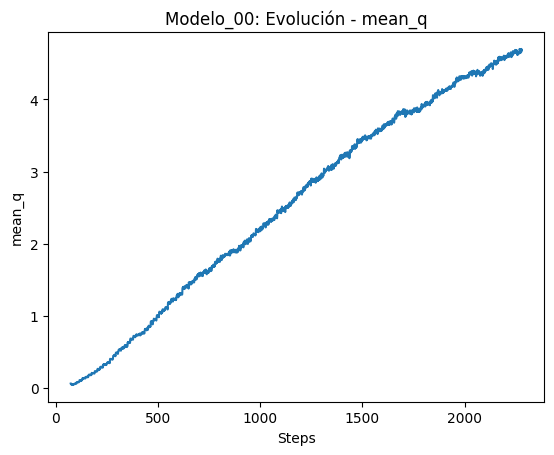

In [ ]:
graph_training(env_name, model_name, 'mean_q')

In [ ]:
# Testing part to calculate the mean reward
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 21.000, steps: 942
Episode 2: reward: 22.000, steps: 816
Episode 3: reward: 10.000, steps: 463
Episode 4: reward: 24.000, steps: 1240
Episode 5: reward: 19.000, steps: 615
Episode 6: reward: 15.000, steps: 913
Episode 7: reward: 21.000, steps: 1082
Episode 8: reward: 23.000, steps: 825
Episode 9: reward: 22.000, steps: 981
Episode 10: reward: 25.000, steps: 856

3. Justificación de los parámetros seleccionados y de los resultados obtenidos

La recompensa media obtenida es de: <span style="color:red">**20,2**</span>

Red neuronal basada en el artículo **[Playing Atari with Deep Reinforcement Learning](https://arxiv.org/pdf/1312.5602.pdf), Minh, V. et al. (2013)** y lo tomaremos como base de comparación del resto de modelos que probaremos a lo largo de este proyecto.

Los hiperparámetros del modelo de Aprendizaje por refuerzo son los mismos que hemos visto en clase para el juego de *Breakout*.

Según se aprecia en la gráfica de la media de la recompensa esperada a futuro, ampliando el tiempo de entrenamiento podrían mejorarse los resultados ya que mantiene una pendiente ascendente al llegar a los 1,75M de steps.

---
### 3.1 Modificando la red neuronal del Agente

- - -
#### 3.1.1. Modelo 1

In [ ]:
load_hyperparameters(0)

1. Implementación de la red neuronal

In [ ]:
model_name = 'Modelo_01'

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

model = Sequential()

print(K.image_data_format())

if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

model.add(Convolution2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))

print(model.summary())

channels_last
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_11 (Permute)         (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 84, 84, 32)        1184      
_________________________________________________________________
activation_42 (Activation)   (None, 84, 84, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 42, 42, 64)        18496     
_________________________________________________________________
activation_43 (Activation)   (None, 42, 42, 64)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 21,

2. Implementación de la solución DQN

In [ ]:
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()

In [ ]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)

In [ ]:
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,       # Acumular memoria inicial
               gamma=GAMMA,                        # Discount reward
               target_model_update=MODEL_UPDATE,   # Actualización del modelo
               train_interval=4)

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

In [ ]:
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
checkpoint_weights_filename = CHECKPOINT_PATH + 'dqn_' + env_name + '_weights_{step}.h5f'
log_filename = LOGS_PATH + 'dqn_{}_log_{}.json'.format(env_name, model_name)

callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=MODEL_CHECKPOINT_STEPS)]
callbacks += [FileLogger(log_filename, interval=100)]

dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS, log_interval=LOG_INTERVAL, visualize=False)

dqn.save_weights(weights_filename, overwrite=True)

2172


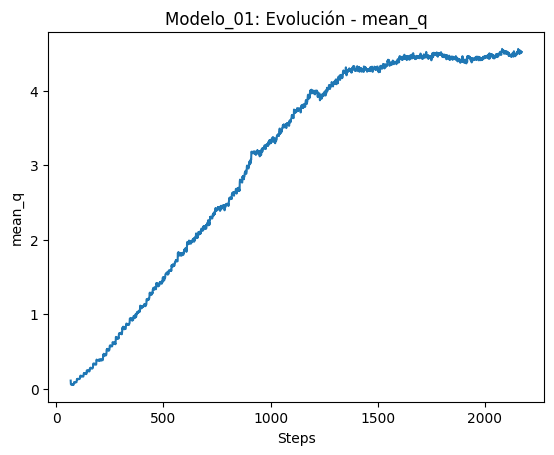

In [ ]:
graph_training(env_name, model_name, 'mean_q')

In [ ]:
# Testing part to calculate the mean reward
weights_filename = 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 16.000, steps: 634
Episode 2: reward: 18.000, steps: 620
Episode 3: reward: 13.000, steps: 599
Episode 4: reward: 27.000, steps: 904
Episode 5: reward: 18.000, steps: 785
Episode 6: reward: 11.000, steps: 510
Episode 7: reward: 22.000, steps: 987
Episode 8: reward: 19.000, steps: 730
Episode 9: reward: 15.000, steps: 492
Episode 10: reward: 17.000, steps: 708


3. Justificación de los parámetros seleccionados y de los resultados obtenidos

La recompensa media obtenida es de **17,6**

Respecto del modelo base se han modificado los strides, que ahora son iguales a 2, y empleando para reducir el tamaño de cada filtro una capa *MaxPooling2D*.

La pérdida de información al aplicar este tipo de reducción de la dimensionalidad de cada filtro pude ocasionar la pérdida de puntuación.

- - -
#### 3.1.2. Modelo 2

In [ ]:
load_hyperparameters(0)

1. Implementación de la red neuronal

In [ ]:
model_name = 'Modelo_02'

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

model = Sequential()

print(K.image_data_format())

if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

model.add(Convolution2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))

print(model.summary())

channels_last
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_12 (Permute)         (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 84, 84, 32)        1184      
_________________________________________________________________
activation_47 (Activation)   (None, 84, 84, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 84, 84, 32)        128       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 42, 42, 64)        18496     
_________________________________________________________________
activation_48 (Activation)   (None, 42,

2. Implementación de la solución DQN

In [ ]:
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()

In [ ]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)

In [ ]:
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,       # Acumular memoria inicial
               gamma=GAMMA,                        # Discount reward
               target_model_update=MODEL_UPDATE,   # Actualización del modelo
               train_interval=4)

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

In [ ]:
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
checkpoint_weights_filename = CHECKPOINT_PATH + 'dqn_' + env_name + '_weights_{step}.h5f'
log_filename = LOGS_PATH + 'dqn_{}_log_{}.json'.format(env_name, model_name)

callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=MODEL_CHECKPOINT_STEPS)]
callbacks += [FileLogger(log_filename, interval=100)]

dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS, log_interval=LOG_INTERVAL, visualize=False)

dqn.save_weights(weights_filename, overwrite=True)

2083


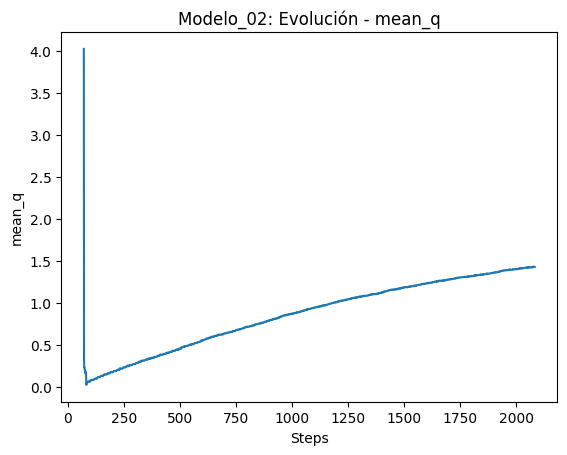

In [ ]:
graph_training(env_name, model_name, 'mean_q')

In [ ]:
# Testing part to calculate the mean reward
weights_filename = 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 17.000, steps: 968
Episode 2: reward: 17.000, steps: 971
Episode 3: reward: 17.000, steps: 965
Episode 4: reward: 17.000, steps: 959
Episode 5: reward: 17.000, steps: 951
Episode 6: reward: 17.000, steps: 961
Episode 7: reward: 17.000, steps: 952
Episode 8: reward: 17.000, steps: 973
Episode 9: reward: 17.000, steps: 976
Episode 10: reward: 17.000, steps: 977


3. Justificación de los parámetros seleccionados y de los resultados obtenidos

La recompensa media obtenida es de **17,0**

Se ha incluido un *Batch Normalization* tras cada capa convolucional.

Viendo la gráfica de la media de la recompensa esperada a futuro vemos que tiene un incremento más constante pero más lento, de ahí que el resultado empeore respecto del modelo anterior. Es por esto que también que todos los resultados del test sean iguales.

- - -
#### 3.1.3. Modelo 3

In [ ]:
load_hyperparameters(0)

1. Implementación de la red neuronal

In [ ]:
model_name = 'Modelo_03'

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

model = Sequential()

print(K.image_data_format())

if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

model.add(Convolution2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))

print(model.summary())

channels_last
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_13 (Permute)         (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 84, 84, 32)        1184      
_________________________________________________________________
activation_52 (Activation)   (None, 84, 84, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 84, 84, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 42, 42, 64)        18496     
_________________________________________________________________
activation_53 (Activation)   (None, 42,

2. Implementación de la solución DQN

In [ ]:
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()

In [ ]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)

In [ ]:
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,       # Acumular memoria inicial
               gamma=GAMMA,                        # Discount reward
               target_model_update=MODEL_UPDATE,   # Actualización del modelo
               train_interval=4)

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

In [ ]:
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
checkpoint_weights_filename = CHECKPOINT_PATH + 'dqn_' + env_name + '_weights_{step}.h5f'
log_filename = LOGS_PATH + 'dqn_{}_log_{}.json'.format(env_name, model_name)

callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=MODEL_CHECKPOINT_STEPS)]
callbacks += [FileLogger(log_filename, interval=100)]

dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS, log_interval=LOG_INTERVAL, visualize=False)

dqn.save_weights(weights_filename, overwrite=True)

2446


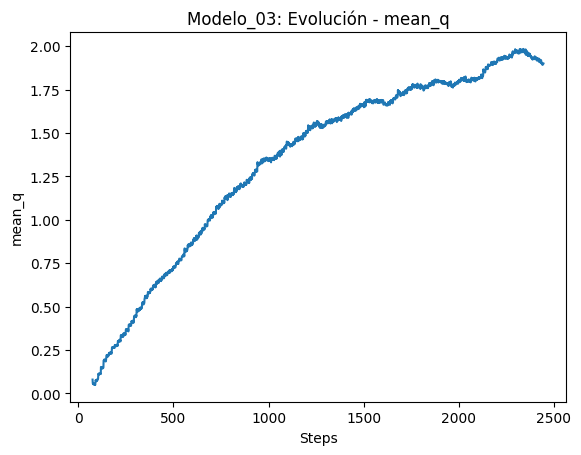

In [ ]:
graph_training(env_name, model_name, 'mean_q')

In [ ]:
# Testing part to calculate the mean reward
weights_filename = 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 12.000, steps: 840
Episode 2: reward: 12.000, steps: 845
Episode 3: reward: 12.000, steps: 838
Episode 4: reward: 12.000, steps: 837
Episode 5: reward: 16.000, steps: 952
Episode 6: reward: 11.000, steps: 814
Episode 7: reward: 11.000, steps: 809
Episode 8: reward: 12.000, steps: 823
Episode 9: reward: 12.000, steps: 841
Episode 10: reward: 12.000, steps: 860


3. Justificación de los parámetros seleccionados y de los resultados obtenidos

La recompensa media obtenida es de **12,2**

Se ha incluido *Dropout* del 20% en lugar de *Batch Normalization* tras cada capa convolucional.

Viendo la gráfica de la media de la recompensa esperada a futuro vemos que alcanza valores menores, de ahí que el resultado empeore respecto del modelo anterior.

- - -
#### 3.1.4. Modelo 4

In [ ]:
load_hyperparameters(0)

1. Implementación de la red neuronal

In [ ]:
model_name = 'Modelo_04'

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

model = Sequential()

print(K.image_data_format())

if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

# Block 1
model.add(Convolution2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Block 2
model.add(Convolution2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Block 3
model.add(Convolution2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((1, 1)))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Top Model
model.add(GlobalAveragePooling2D())
model.add(Dense(nb_actions))
model.add(Activation('linear'))

print(model.summary())

channels_last
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute (Permute)            (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 84, 84, 32)        1184      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 32)        0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 42, 42, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 42, 42, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 42, 42, 32)        0         
____________________________________

2. Implementación de la solución DQN

In [ ]:
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()

In [ ]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)

In [ ]:
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,       # Acumular memoria inicial
               gamma=GAMMA,                        # Discount reward
               target_model_update=MODEL_UPDATE,   # Actualización del modelo
               train_interval=4)

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

In [ ]:
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
checkpoint_weights_filename = CHECKPOINT_PATH + 'dqn_' + env_name + '_weights_{step}.h5f'
log_filename = LOGS_PATH + 'dqn_{}_log_{}.json'.format(env_name, model_name)

callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=MODEL_CHECKPOINT_STEPS)]
callbacks += [FileLogger(log_filename, interval=100)]

dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS, log_interval=LOG_INTERVAL, visualize=False)

dqn.save_weights(weights_filename, overwrite=True)

1001


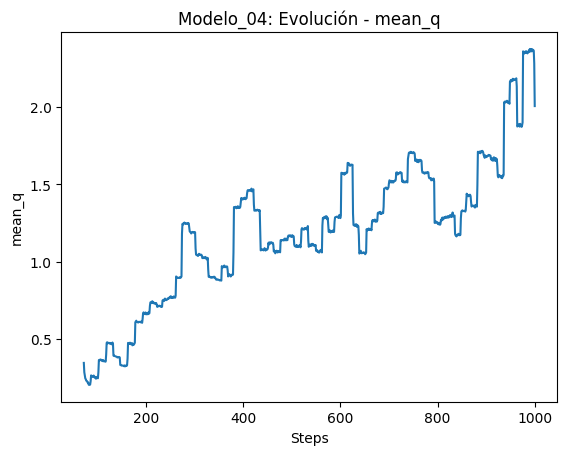

In [ ]:
graph_training(env_name, model_name, 'mean_q')

In [ ]:
# Testing part to calculate the mean reward
weights_filename = 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 15.000, steps: 1211
Episode 2: reward: 16.000, steps: 898
Episode 3: reward: 18.000, steps: 1128
Episode 4: reward: 21.000, steps: 1456
Episode 5: reward: 15.000, steps: 767
Episode 6: reward: 17.000, steps: 1122
Episode 7: reward: 14.000, steps: 678
Episode 8: reward: 19.000, steps: 987
Episode 9: reward: 18.000, steps: 1231
Episode 10: reward: 20.000, steps: 1023


3. Justificación de los parámetros seleccionados y de los resultados obtenidos

La recompensa media obtenida es de **17,3**

Se ha incluido una regularización *L2* en cada capa convolucional, con una función de pérdida *LeayReLU* (en lugar de *ReLU* como hasta ahora). También se ha incluido *Batch Normalization* y *Dropout* del 20% tras cada capa convolucional.

Este modelo tan complejo, además de tner un entrenamiento mucho más lento, tampoco llega a alcanzar la puntuación media mínima exigida de 20 ptos.

---
### 3.2. Modificando el algorítmo de Aprendizaje por refuerzo

- - -
#### 3.2.1. Modelo 5

In [ ]:
load_hyperparameters(2)

1. Implementación de la red neuronal (misma arquitectura del Modelo 1 cambiando los hiperparámetros del algoritmo de ApR)

In [ ]:
model_name = 'Modelo_05'

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

model = Sequential()

print(K.image_data_format())

if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

model.add(Convolution2D(32, (8, 8), strides=(4, 4)))
model.add(Activation('relu'))

model.add(Convolution2D(64, (4, 4), strides=(2, 2)))
model.add(Activation('relu'))

model.add(Convolution2D(64, (3, 3), strides=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(nb_actions))
model.add(Activation('linear'))
model.summary()

channels_last
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_15 (Permute)         (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 20, 20, 32)        8224      
_________________________________________________________________
activation_58 (Activation)   (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 9, 9, 64)          32832     
_________________________________________________________________
activation_59 (Activation)   (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
activation_60 (Activation)   (None, 7, 

2. Implementación de la solución DQN

In [ ]:
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()

In [ ]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)

In [ ]:
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,       # Acumular memoria inicial
               gamma=GAMMA,                        # Discount reward
               target_model_update=MODEL_UPDATE,   # Actualización del modelo
               train_interval=4)

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

In [ ]:
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
checkpoint_weights_filename = CHECKPOINT_PATH + 'dqn_' + env_name + '_weights_{step}.h5f'
log_filename = LOGS_PATH + 'dqn_{}_log_{}.json'.format(env_name, model_name)

callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=MODEL_CHECKPOINT_STEPS)]
callbacks += [FileLogger(log_filename, interval=100)]

dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS, log_interval=LOG_INTERVAL, visualize=False)

dqn.save_weights(weights_filename, overwrite=True)

2396


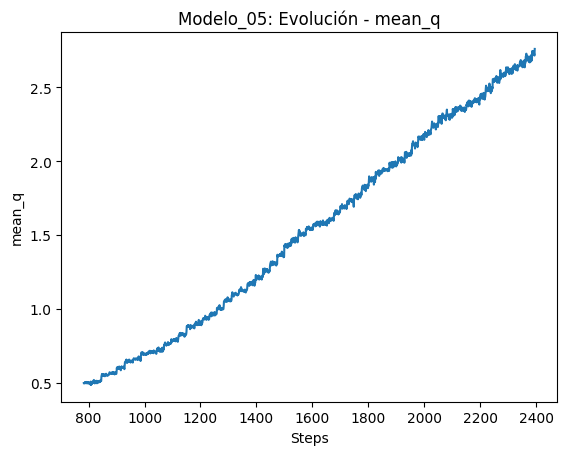

In [ ]:
graph_training(env_name, model_name, 'mean_q')

In [ ]:
# Testing part to calculate the mean reward
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 21.000, steps: 942
Episode 2: reward: 22.000, steps: 816
Episode 3: reward: 10.000, steps: 463
Episode 4: reward: 24.000, steps: 1240
Episode 5: reward: 19.000, steps: 615
Episode 6: reward: 15.000, steps: 913
Episode 7: reward: 21.000, steps: 1082
Episode 8: reward: 23.000, steps: 825
Episode 9: reward: 22.000, steps: 981
Episode 10: reward: 25.000, steps: 856

3. Justificación de los parámetros seleccionados y de los resultados obtenidos

La recompensa media obtenida es de: <span style="color:red">**24,1**</span>

Una vez hemos explorado distintas soluciones del modelo de red neuronal del agente sin obtener mejores resultados, pasamos a probar diferentes hiperparámetros en el algorítmo de aprendizaje por refuerzo. En este caso, aumentando el warmup inicial a 500.000 steps, se mejora la puntuación, incluso alcanzado sobradamente la puntuacion mínima pedida en el enunciado. Con este cambio se ha aumentado x10 la exploración inicial aleatoria del entorno. Al ser un algorítmo *off-policy*, estás serán tenidas en cuenta durante el proceso de entrenamiento hasta que se llene la memoria con transiciones de políticas posteriores.

- - -
#### 3.2.2. Modelo 6

In [ ]:
load_hyperparameters(10)

1. Implementación de la red neuronal (misma arquitectura del Modelo 1 cambiando los hiperparámetros del algoritmo de ApR)

In [ ]:
model_name = 'Modelo_06'

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

model = Sequential()

print(K.image_data_format())

if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

model.add(Convolution2D(32, (8, 8), strides=(4, 4)))
model.add(Activation('relu'))

model.add(Convolution2D(64, (4, 4), strides=(2, 2)))
model.add(Activation('relu'))

model.add(Convolution2D(64, (3, 3), strides=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(nb_actions))
model.add(Activation('linear'))
model.summary()

channels_last
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_20 (Permute)         (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 20, 20, 32)        8224      
_________________________________________________________________
activation_83 (Activation)   (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 9, 9, 64)          32832     
_________________________________________________________________
activation_84 (Activation)   (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
activation_85 (Activation)   (None, 7, 

2. Implementación de la solución DQN

In [ ]:
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()

In [ ]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)

In [ ]:
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,       # Acumular memoria inicial
               gamma=GAMMA,                        # Discount reward
               target_model_update=MODEL_UPDATE,   # Actualización del modelo
               train_interval=4)

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

In [ ]:
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
checkpoint_weights_filename = CHECKPOINT_PATH + 'dqn_' + env_name + '_weights_{step}.h5f'
log_filename = LOGS_PATH + 'dqn_{}_log_{}.json'.format(env_name, model_name)

callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=MODEL_CHECKPOINT_STEPS)]
callbacks += [FileLogger(log_filename, interval=100)]

dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS, log_interval=LOG_INTERVAL, visualize=False)

dqn.save_weights(weights_filename, overwrite=True)

2263


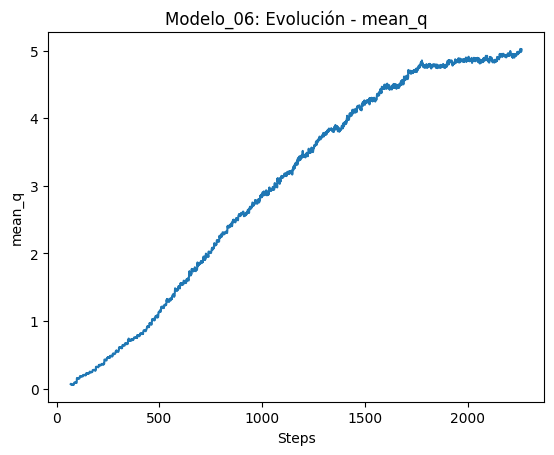

In [ ]:
graph_training(env_name, model_name, 'mean_q')

In [ ]:
# Testing part to calculate the mean reward
weights_filename = 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 12.000, steps: 670
Episode 2: reward: 20.000, steps: 902
Episode 3: reward: 13.000, steps: 633
Episode 4: reward: 17.000, steps: 978
Episode 5: reward: 14.000, steps: 621
Episode 6: reward: 21.000, steps: 869
Episode 7: reward: 17.000, steps: 833
Episode 8: reward: 18.000, steps: 796
Episode 9: reward: 27.000, steps: 944
Episode 10: reward: 12.000, steps: 670


3. Justificación de los parámetros seleccionados y de los resultados obtenidos

La recompensa media obtenida es de: **17,1**

En este modelo, se ha reducido el tamaño de la memoria a la mitad, con el objetivo de "olvidar" acciones al principio del entrenamiento, totalmente aleatorias, y mantener las más recientes, según ha ido aprendiendo el modelo. La pérdida de exploración en este caso, en contraposición al modelo anterior, redunda en una peor puntuación media.

- - -
#### 3.2.3. Modelo 7

In [ ]:
load_hyperparameters(4)

1. Implementación de la red neuronal (misma arquitectura del Modelo 1 cambiando los hiperparámetros del algoritmo de ApR)

In [ ]:
model_name = 'Modelo_07'

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

model = Sequential()

print(K.image_data_format())

if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

model.add(Convolution2D(32, (8, 8), strides=(4, 4)))
model.add(Activation('relu'))

model.add(Convolution2D(64, (4, 4), strides=(2, 2)))
model.add(Activation('relu'))

model.add(Convolution2D(64, (3, 3), strides=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(nb_actions))
model.add(Activation('linear'))
model.summary()

channels_last
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_21 (Permute)         (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 20, 20, 32)        8224      
_________________________________________________________________
activation_88 (Activation)   (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 9, 9, 64)          32832     
_________________________________________________________________
activation_89 (Activation)   (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
activation_90 (Activation)   (None, 7, 

2. Implementación de la solución DQN

In [ ]:
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()

In [ ]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)

In [ ]:
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,       # Acumular memoria inicial
               gamma=GAMMA,                        # Discount reward
               target_model_update=MODEL_UPDATE,   # Actualización del modelo
               train_interval=4,
               enable_dueling_network=DUELING, dueling_type=DUELING_TYPE)

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

In [ ]:
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
checkpoint_weights_filename = CHECKPOINT_PATH + 'dqn_' + env_name + '_weights_{step}.h5f'
log_filename = LOGS_PATH + 'dqn_{}_log_{}.json'.format(env_name, model_name)

callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=MODEL_CHECKPOINT_STEPS)]
callbacks += [FileLogger(log_filename, interval=100)]

dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS, log_interval=LOG_INTERVAL, visualize=False)

dqn.save_weights(weights_filename, overwrite=True)

2264


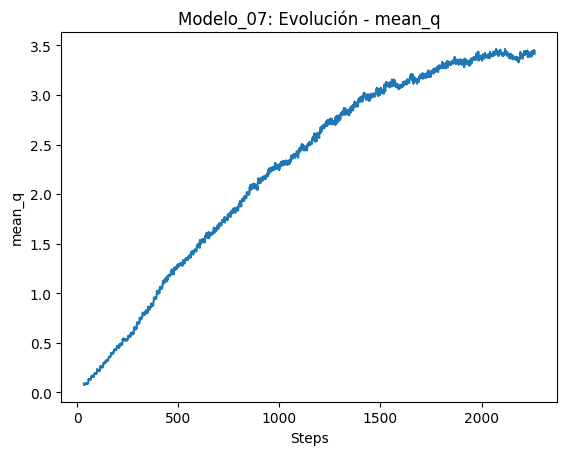

In [ ]:
graph_training(env_name, model_name, 'mean_q')

In [ ]:
# Testing part to calculate the mean reward
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 14.000, steps: 552
Episode 2: reward: 14.000, steps: 857
Episode 3: reward: 10.000, steps: 577
Episode 4: reward: 22.000, steps: 832
Episode 5: reward: 19.000, steps: 1020
Episode 6: reward: 12.000, steps: 579
Episode 7: reward: 24.000, steps: 1391
Episode 8: reward: 22.000, steps: 824
Episode 9: reward: 23.000, steps: 893
Episode 10: reward: 23.000, steps: 902

3. Justificación de los parámetros seleccionados y de los resultados obtenidos

La recompensa media obtenida es de: **18,3**

En este modelo, se ha reducido el warmup inicial a la mitad (25.000 steps), y la puntuación empeora, Se ha reducido la exploración inicial aleatoria del entorno. Como se comentó en el modelo anterior, al ser un algorítmo *off-policy*, estás exploración será tenida en cuenta durante el proceso de entrenamiento hasta que se llene la memoria, y no es exploración suficiente.

Se ha incluido *Dueling network* en este modelo en base al artículo **[Dueling Network Architectures for Deep Reinforcement Learning](https://arxiv.org/pdf/1511.06581.pdf), Wang, Z. et al. (2015)**. Esta red contiene dos estimadores diferentes: uno para la función *Value* y otro para la función de *Advantage*. El objetivo es generalizar el aprendizaje entre acciones y conduce a una mejor evaluación de políticas en presencia de muchas acciones de valor similar.

Puede verse que, con menor exloración pero añadiendo *Dueling network*, los resultados, aunque insuficientes, son aceptables.

- - -
#### 3.2.4. Modelo 8

In [ ]:
load_hyperparameters(0)

1. Implementación de la red neuronal (misma arquitectura del Modelo 1 cambiando los hiperparámetros del algoritmo de ApR)

In [ ]:
model_name = 'Modelo_08'

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

model = Sequential()

print(K.image_data_format())

if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

model.add(Convolution2D(32, (8, 8), strides=(4, 4)))
model.add(Activation('relu'))

model.add(Convolution2D(64, (4, 4), strides=(2, 2)))
model.add(Activation('relu'))

model.add(Convolution2D(64, (3, 3), strides=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(nb_actions))
model.add(Activation('linear'))
model.summary()

channels_last
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_3 (Permute)          (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 32)        8224      
_________________________________________________________________
activation_11 (Activation)   (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 64)          32832     
_________________________________________________________________
activation_12 (Activation)   (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
activation_13 (Activation)   (None, 7, 7

2. Implementación de la solución DQN

In [ ]:
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()

In [ ]:
policy = BoltzmannQPolicy(tau=1.)

In [ ]:
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,       # Acumular memoria inicial
               gamma=GAMMA,                        # Discount reward
               target_model_update=MODEL_UPDATE,   # Actualización del modelo
               train_interval=4,
               enable_dueling_network=DUELING, dueling_type=DUELING_TYPE)

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

In [ ]:
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
checkpoint_weights_filename = CHECKPOINT_PATH + 'dqn_' + env_name + '_weights_{step}.h5f'
log_filename = LOGS_PATH + 'dqn_{}_log_{}.json'.format(env_name, model_name)

callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=MODEL_CHECKPOINT_STEPS)]
callbacks += [FileLogger(log_filename, interval=100)]

dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS, log_interval=LOG_INTERVAL, visualize=False)

dqn.save_weights(weights_filename, overwrite=True)

801


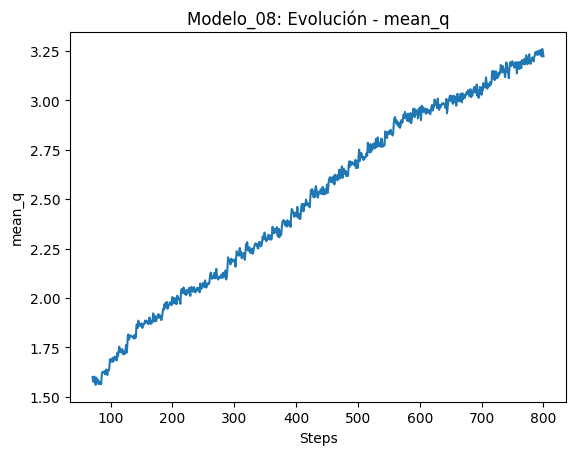

In [ ]:
graph_training(env_name, model_name, 'mean_q')

In [ ]:
# Testing part to calculate the mean reward
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 16.000, steps: 1121
Episode 2: reward: 20.000, steps: 1047
Episode 3: reward: 15.000, steps: 915
Episode 4: reward: 16.000, steps: 987
Episode 5: reward: 23.000, steps: 1123
Episode 6: reward: 20.000, steps: 1075
Episode 7: reward: 18.000, steps: 987
Episode 8: reward: 22.000, steps: 1321
Episode 9: reward: 20.000, steps: 1098
Episode 10: reward: 19.000, steps: 976


3. Justificación de los parámetros seleccionados y de los resultados obtenidos

La recompensa media obtenida es de: **18,9**

En este modelo hemos cambiado el modelo de la *policy*, usando *Boltzmann* en lugar de *$\epsilon$-greedy*. Aunque el resultado no ha llegado a la puntuación mínima, según podemos apreciar en el gráfico hay todavía margen de mejora con un tiempo de entrenamiento, ya que la media de la recompensa esperada a futuro mantiene una pendiente ascendete y constante al alcanzar el límite de 1,75M de steps.

- - -
#### 3.2.5. Modelo 9

In [ ]:
load_hyperparameters(7)

1. Implementación de la red neuronal (misma arquitectura del Modelo 1 cambiando los hiperparámetros del algoritmo de ApR)

In [ ]:
model_name = 'Modelo_09'

input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE

model = Sequential()

print(K.image_data_format())

if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

model.add(Convolution2D(32, (8, 8), strides=(4, 4)))
model.add(Activation('relu'))

model.add(Convolution2D(64, (4, 4), strides=(2, 2)))
model.add(Activation('relu'))

model.add(Convolution2D(64, (3, 3), strides=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(nb_actions))
model.add(Activation('linear'))
model.summary()

channels_last
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_2 (Permute)          (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 32)        8224      
_________________________________________________________________
activation_6 (Activation)    (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
activation_7 (Activation)    (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
activation_8 (Activation)    (None, 7, 7

2. Implementación de la solución DQN

In [ ]:
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()

In [ ]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=1., value_min=.1,
                              value_test=.05,
                              nb_steps=SCHEDULER_STEPS)

In [ ]:
dqn = DQNAgent(model=model,
               nb_actions=nb_actions,
               policy=policy,
               memory=memory,
               processor=processor,
               nb_steps_warmup=WARMUP_STEPS,       # Acumular memoria inicial
               gamma=GAMMA,                        # Discount reward
               target_model_update=MODEL_UPDATE,   # Actualización del modelo
               train_interval=4,
               enable_dueling_network=DUELING, dueling_type=DUELING_TYPE)

dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

In [ ]:
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
checkpoint_weights_filename = CHECKPOINT_PATH + 'dqn_' + env_name + '_weights_{step}.h5f'
log_filename = LOGS_PATH + 'dqn_{}_log_{}.json'.format(env_name, model_name)

callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=MODEL_CHECKPOINT_STEPS)]
callbacks += [FileLogger(log_filename, interval=100)]

dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS, log_interval=LOG_INTERVAL, visualize=False)

dqn.save_weights(weights_filename, overwrite=True)

2360


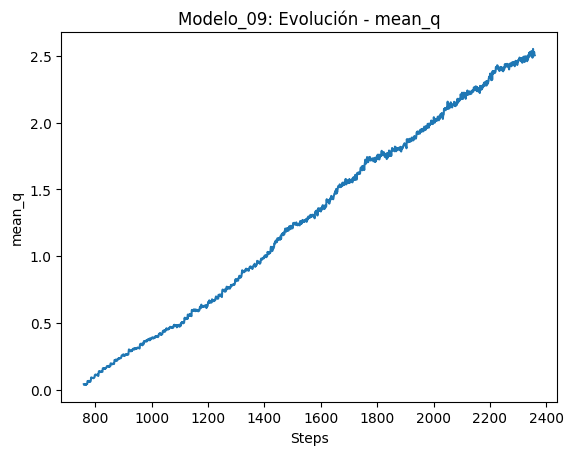

In [ ]:
graph_training(env_name, model_name, 'mean_q')

In [ ]:
# Testing part to calculate the mean reward
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_weights_{}.h5f'.format(env_name, model_name)
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 28.000, steps: 1081
Episode 2: reward: 20.000, steps: 597
Episode 3: reward: 23.000, steps: 706
Episode 4: reward: 31.000, steps: 924
Episode 5: reward: 16.000, steps: 594
Episode 6: reward: 21.000, steps: 761
Episode 7: reward: 31.000, steps: 1246
Episode 8: reward: 26.000, steps: 931
Episode 9: reward: 34.000, steps: 1219
Episode 10: reward: 29.000, steps: 1030

3. Justificación de los parámetros seleccionados y de los resultados obtenidos

La recompensa media obtenida es de: <span style="color:red">**25,9**</span>

Con *Dueling network* y aumentando el warmup inicial x10, respecto del modelo de partida, es decir, reuniendo los últimos dos mejores modelos obtenemos los mejores resultados, casi un 30% por encima del mínimo exigido en el enunciado.

Como se ha comentado en los modelos precedentes, incluyendo por una parte dos estimadores diferentes (uno para la función *Value* y otro para la función de *Advantage*) y aumentando considerablemente la exploración del entorno para que el agente pueda conocer posibles acciones, que de otro modo no podría alcanzar.

---

### Test del mejor modelo

In [ ]:
weights_filename = WEIGHTS_PATH + '/' + 'dqn_{}_best_weights.h5f'.format(env_name)
dqn.load_weights(weights_filename)
H = dqn.test(env, nb_episodes=10, visualize=True)

######### MEDIA ##########
df = pd.DataFrame(H.history)

print("\nLa media de las recompensas obtenidas para 10 episodios aleatorios es de: ",
      f"{round(df['episode_reward'].mean(), 2)} +- {round(df['episode_reward'].std(), 2)}")

Testing for 10 episodes ...
Episode 1: reward: 31.000, steps: 1126
Episode 2: reward: 33.000, steps: 1060
Episode 3: reward: 16.000, steps: 667
Episode 4: reward: 38.000, steps: 1648
Episode 5: reward: 24.000, steps: 675
Episode 6: reward: 29.000, steps: 949
Episode 7: reward: 24.000, steps: 872
Episode 8: reward: 32.000, steps: 1029
Episode 9: reward: 24.000, steps: 925
Episode 10: reward: 23.000, steps: 719

La media de las recompensas obtenidas para 10 episodios aleatorios es de:  27.4 +- 6.36


---